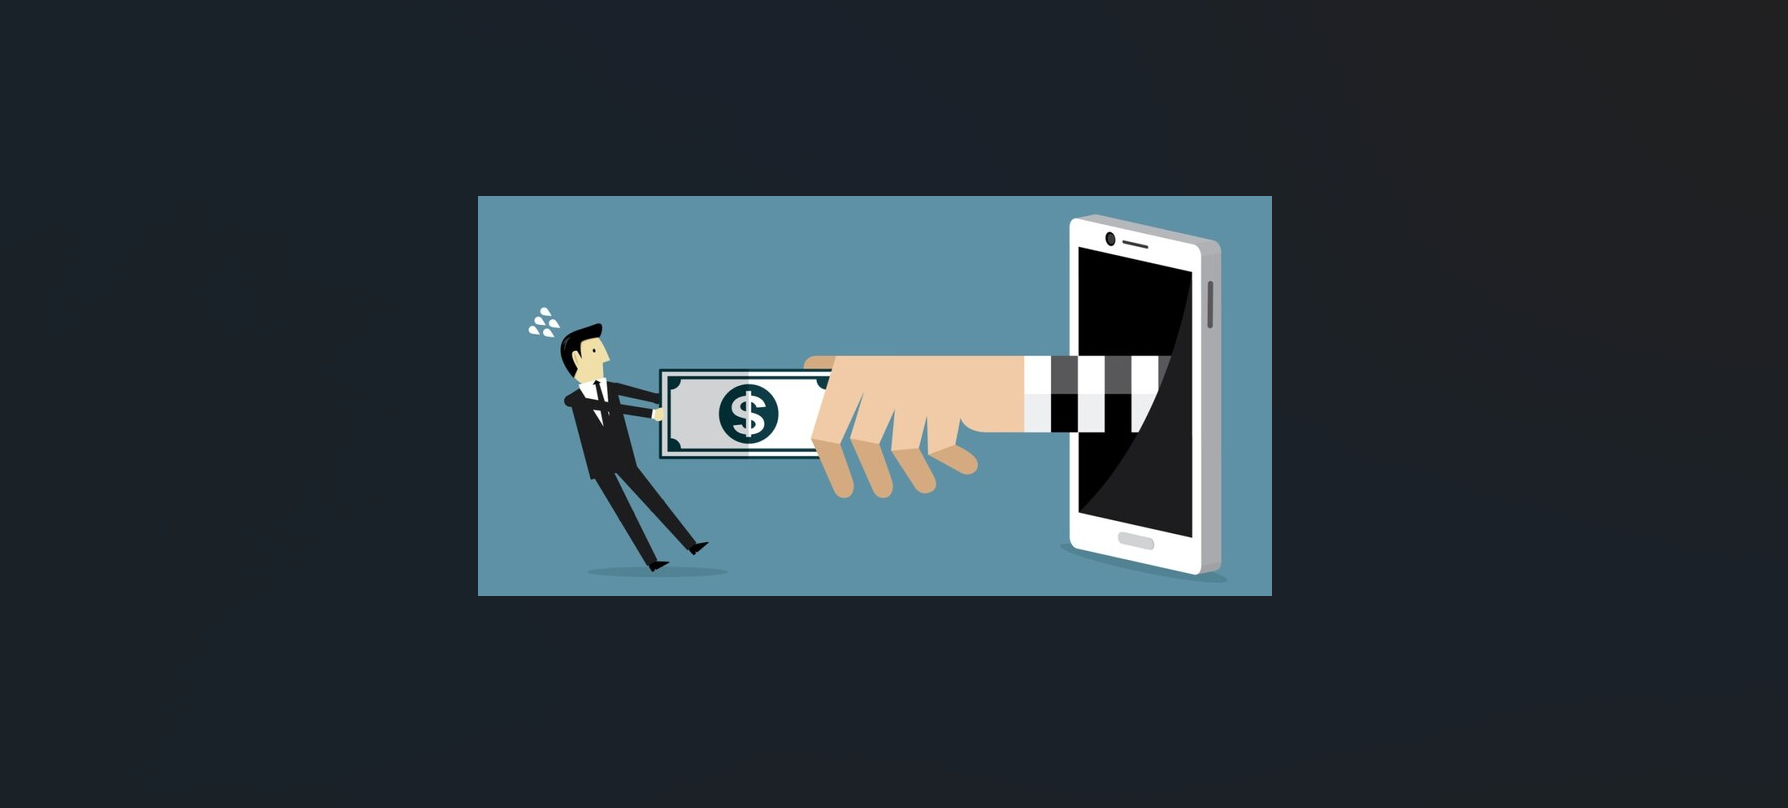

📊 Dataset Overview

This dataset provides a rich and detailed collection of financial transactions, specifically curated for the analysis of financial fraud. 💳 Each record represents a single transaction and is enriched with a wide array of contextual features, including details about the client, the merchant, the payment card, and the geographical location of the event.

The primary objective at this stage is to explore and understand this data deeply, aiming to uncover the patterns, relationships, and characteristics that distinguish legitimate transactions from fraudulent ones.

📖 Data Dictionary

A detailed breakdown of each feature is provided below:

🧾 Transaction Features

    clean_id: A unique identifier for each transaction in the dataset.

    date: 🗓️ The precise timestamp when the transaction occurred. This is crucial for analyzing time-based patterns.

    amount: 💰 The monetary value of the transaction. Anomalies in this value are a key area of interest.

🏪 Merchant Features

    merchant_id: A unique identifier for the merchant.

    merchant_city & merchant_state: The location of the merchant's business.

    mcc (Merchant Category Code): A standard numerical code classifying the merchant's line of business.

    merchant_category: A more descriptive text category for the merchant's business type.

👤 Client & Location Features

    client_id: A unique identifier for the client who owns the card.

    current_age, birth_year, gender: Demographic information about the client.

    yearly_income, total_debt, credit_score: Key financial indicators of the client's financial health.

    latitude & longitude: 📍 The geographical coordinates of the transaction, valuable for analyzing location-based anomalies.

💳 Card Features

    card_id: A unique identifier for the specific card used.

    card_brand: The brand of the card (e.g., Visa, Mastercard).

    card_type: The type of card, typically 'Credit' or 'Debit'.

    credit_limit: The maximum credit limit on the card.

    has_chip: A boolean flag indicating if the card is chip-enabled for enhanced security.

    card_on_dark_web: 🕵️ A critical flag that is true if the card's details have been found compromised on the dark web.

🎯 The Classification Column

    is_fraud: This column classifies each transaction. It serves as a binary flag where 1 indicates the transaction is fraudulent, and 0 indicates it is legitimate. Our analysis will focus on understanding the characteristics that differentiate these two groups.

# **import libraries**

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import missingno as msno
import warnings 
warnings.filterwarnings('ignore')


# **Exploratory Data Analysis (EDA)**

## **load data**

In [3]:
df=pd.read_csv(r'D:\INSTANT\archive(1)\transactions.csv')

## **inspect and understand data**

In [4]:
pd.set_option('display.max_columns',None)
df.head()

,clean_id,date,amount,merchant_id,merchant_city,merchant_state,mcc,client_id,current_age,birth_year,gender,yearly_income,total_debt,credit_score,latitude,longitude,card_id,card_brand,card_type,credit_limit,has_chip,card_on_dark_web,merchant_category,is_fraud
0,305555,2010-04-15 14:22:00,69.32,93831,Fayetteville,NC,5411,231,55,1964,Female,36270.0,73779.0,769,35.049999,-78.870003,5091,Mastercard,Debit (Prepaid),80.0,True,No,"Grocery Stores, Supermarkets",NaN
1,305557,2010-04-15 14:22:00,14.15,10185,Newport,VT,5655,1128,47,1972,Male,34606.0,23909.0,680,44.529999,-72.000000,4548,Mastercard,Debit,15110.0,True,No,"Sports Apparel, Riding Apparel Stores",NaN
2,305560,2010-04-15 14:23:00,33.30,55240,Chandler,TX,7210,1404,52,1967,Female,36472.0,80469.0,526,32.299999,-95.470001,2989,Visa,Debit,4906.0,True,No,Laundry Services,NaN
3,305562,2010-04-15 14:24:00,14.98,83271,Everett,PA,4214,1250,85,1935,Female,38499.0,1493.0,746,40.009998,-78.360001,2610,Mastercard,Debit,11857.0,True,No,Motor Freight Carriers and Trucking,NaN
4,305566,2010-04-15 14:25:00,50.96,18563,ONLINE,NaN,4121,1142,52,1967,Male,79272.0,107029.0,716,42.150002,-71.129997,4674,Mastercard,Debit,43984.0,True,No,Taxicabs and Limousines,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13305915 entries, 0 to 13305914
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   clean_id           int64  
 1   date               object 
 2   amount             float64
 3   merchant_id        int64  
 4   merchant_city      object 
 5   merchant_state     object 
 6   mcc                int64  
 7   client_id          int64  
 8   current_age        int64  
 9   birth_year         int64  
 10  gender             object 
 11  yearly_income      float64
 12  total_debt         float64
 13  credit_score       int64  
 14  latitude           float64
 15  longitude          float64
 16  card_id            int64  
 17  card_brand         object 
 18  card_type          object 
 19  credit_limit       float64
 20  has_chip           bool   
 21  card_on_dark_web   object 
 22  merchant_category  object 
 23  is_fraud           float64
dtypes: bool(1), float64(7), int64(8), object(8)
memo

In [ ]:
print(f"shape = {df.shape}")
print(f"number of rows: {df.shape[0]}")
print(f"number of columns: {df.shape[1]}")


shape = (13305915, 24)
number of rows: 13305915
number of columns: 24


🧹 First-Step Data Tidying

This section outlines a few preliminary cleaning actions taken after a quick first look at the data. The goal is simply to handle the most obvious issues before proceeding with a deeper exploratory analysis.

    Initial Column Removal: Dropping columns that are clearly uninformative (e.g., unique IDs or redundant data).

    Basic Data Type Correction: Adjusting the most apparent incorrect data types to prepare for analysis (e.g., converting text to datetime).

In [ ]:
df.isna().sum().reset_index().rename(columns={'index':'column',0:'missing_values'}).sort_values(by='missing_values',ascending=False)

,column,missing_values
23,is_fraud,10089545
5,merchant_state,1563700
13,credit_score,0
22,merchant_category,0
21,card_on_dark_web,0
20,has_chip,0
19,credit_limit,0
18,card_type,0
17,card_brand,0
16,card_id,0


In [5]:
df.dropna(subset=['is_fraud'], inplace=True)

In [6]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [7]:

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['dayofweek'] = df['date'].dt.dayofweek 

In [8]:
cat_cols= df.select_dtypes(include='object').columns.tolist()
num_cols= df.select_dtypes(include=['int64','float64']).columns.tolist()

In [ ]:
def visualize_categorical_plots(df, cat_cols):
    for col in cat_cols:
        counts = df[col].value_counts()
        n_unique = counts.shape[0]

        if n_unique <= 5:
            fig, axes = plt.subplots(1, 2, figsize=(12, 4))

            sns.countplot(x=df[col], palette="pastel", edgecolor="black", ax=axes[0])
            axes[0].set_title(f'Countplot of {col}')
            axes[0].tick_params(axis='x', rotation=45)

            counts.plot.pie(
                autopct='%1.1f%%',
                startangle=90,
                colors=sns.color_palette("Set3"),
                ax=axes[1]
            )
            axes[1].set_ylabel("")
            axes[1].set_title(f'Pie chart of {col}')
            axes[1].axis("equal")
            plt.tight_layout()
            plt.show()

        else:
            plt.figure(figsize=(10, 4))
            top10 = counts.head(10)
            sns.barplot(x=top10.index, y=top10.values, palette="Set2", edgecolor="black")
            plt.title(f'Top 10 categories in {col}')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()


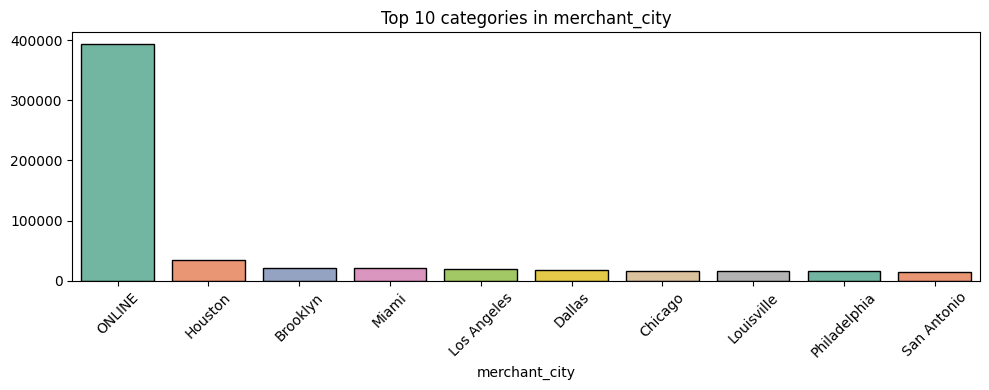

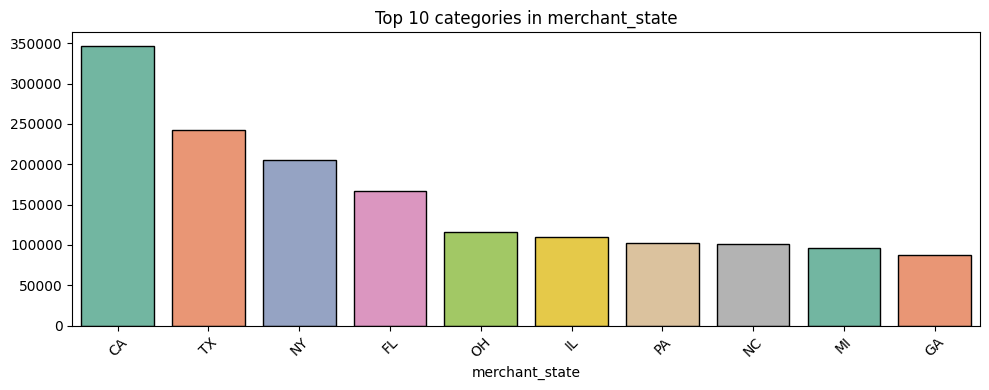

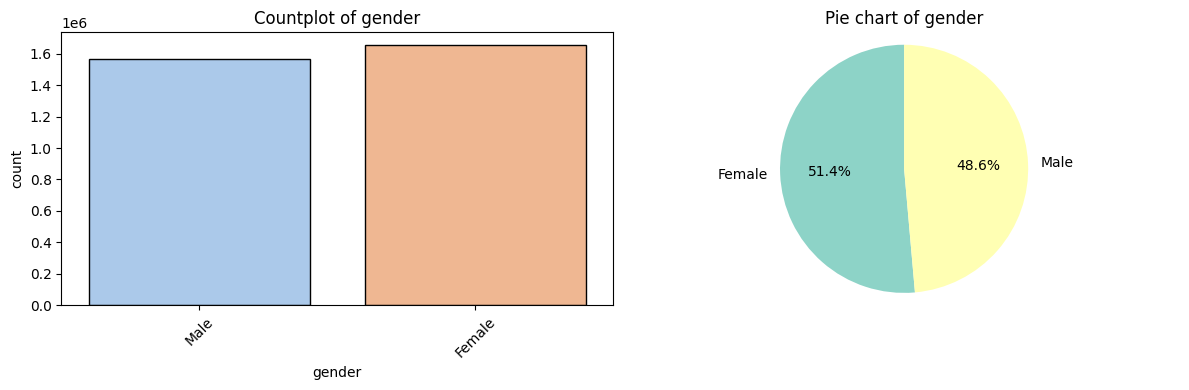

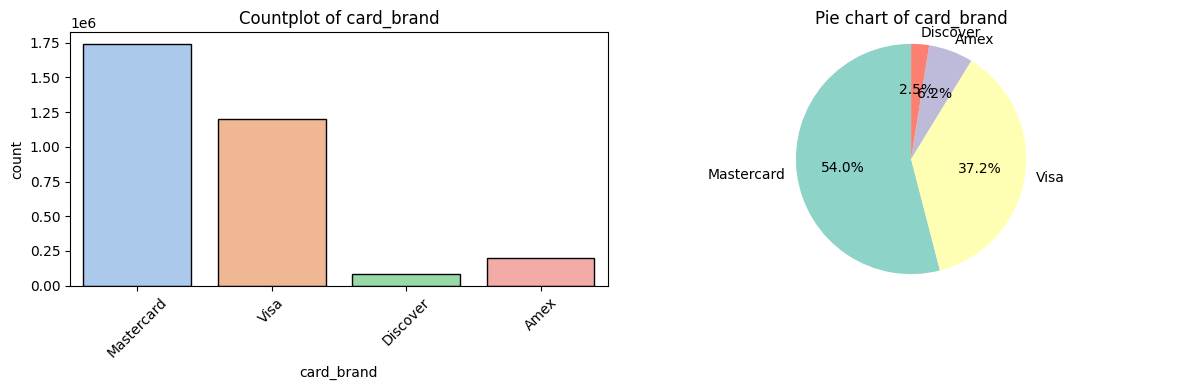

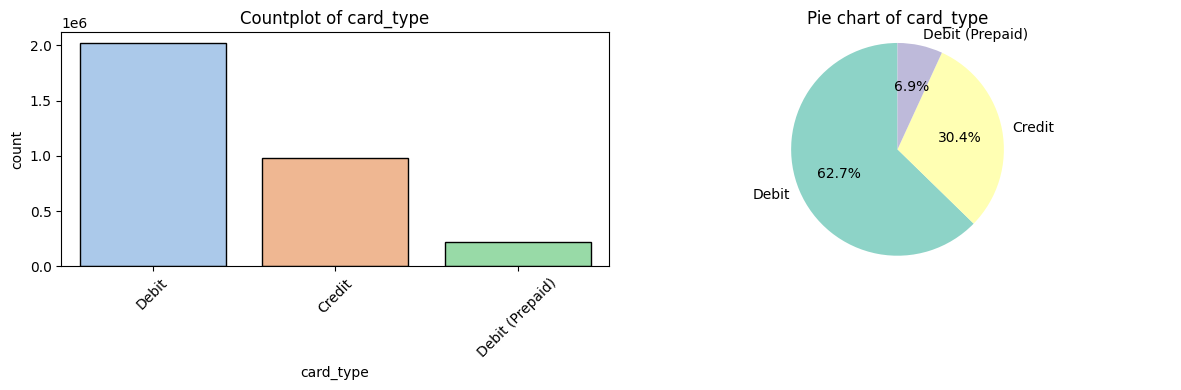

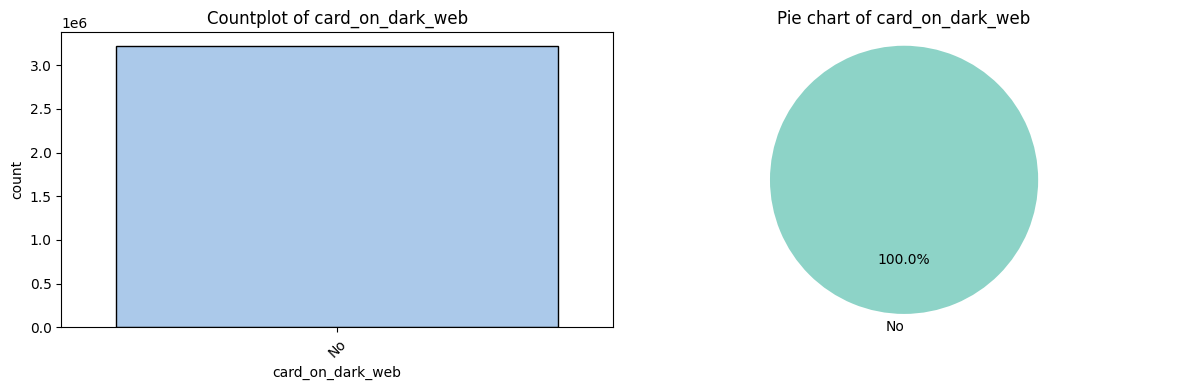

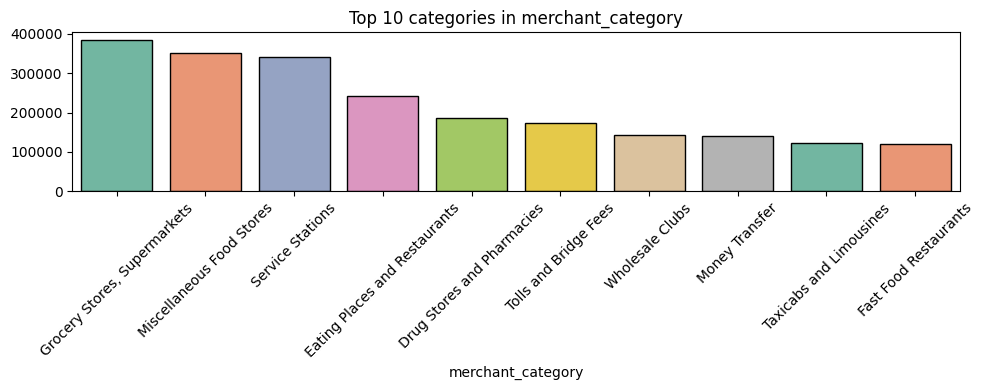

In [ ]:
visualize_categorical_plots(df, cat_cols)

🧐 Key Insights from the Analysis

• The highest number of online transactions come from Houston 📍
• Female customers tend to perform more transactions than males 👩
• No cards were found on the Dark Web 🚫🕸️
• California hosts the largest number of merchants 🌉
• MasterCard (especially Debit) outperforms other card types 🃏💳
• Transactions are mostly concentrated in Restaurants and Supermarkets 🍽️🛒
• Transaction volumes across the days of the week are very similar, with no significant peaks 📆

In [ ]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
clean_id,3216370.0,10381811.061986,7475327.0,8917151.5,10379683.0,11841543.75,13305915.0,1685827.617728
date,3216370,2017-09-26 17:48:49.916290048,2015-08-27 06:44:00,2016-09-09 07:16:15,2017-09-26 07:45:30,2018-10-13 08:06:45,2019-10-31 23:59:00,NaN
amount,3216370.0,42.712742,-500.0,8.89,28.82,63.01,5591.73,80.903254
merchant_id,3216370.0,47676.213112,2.0,25887.0,45926.0,67570.0,100340.0,25820.97495
mcc,3216370.0,5563.943765,1711.0,5300.0,5499.0,5812.0,9402.0,877.204463
client_id,3216370.0,1026.842925,0.0,525.0,1069.0,1530.0,1998.0,580.622915
current_age,3216370.0,53.679426,23.0,42.0,51.0,63.0,101.0,15.850221
birth_year,3216370.0,1965.502923,1918.0,1956.0,1968.0,1977.0,1996.0,15.839511
yearly_income,3216370.0,46709.348273,1.0,32847.0,41141.0,54013.0,280199.0,24394.990241
total_debt,3216370.0,58308.985342,0.0,16552.0,51751.0,85160.0,461854.0,52291.662485


In [ ]:
def visualize_num_cols(df, num_cols):
    ignore = ['mcc', 'client_id', 'merchant_id', 'clean_id', 'card_id']
    for col in num_cols:
        if col in ignore:
            continue
        
        plt.figure(figsize=(14, 5))

        plt.subplot(1, 2, 1)
        sns.histplot(df[col], kde=True, color='#1f77b4')
        plt.title(f'Histogram of {col}', fontsize=14)
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.grid(axis='y', linestyle='--', alpha=0.7)

        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[col], color='#ff7f0e')
        plt.title(f'Boxplot of {col}', fontsize=14)
        plt.xlabel(col, fontsize=12)
        plt.xticks(fontsize=10)

        plt.tight_layout(pad=3.0)
        plt.show()


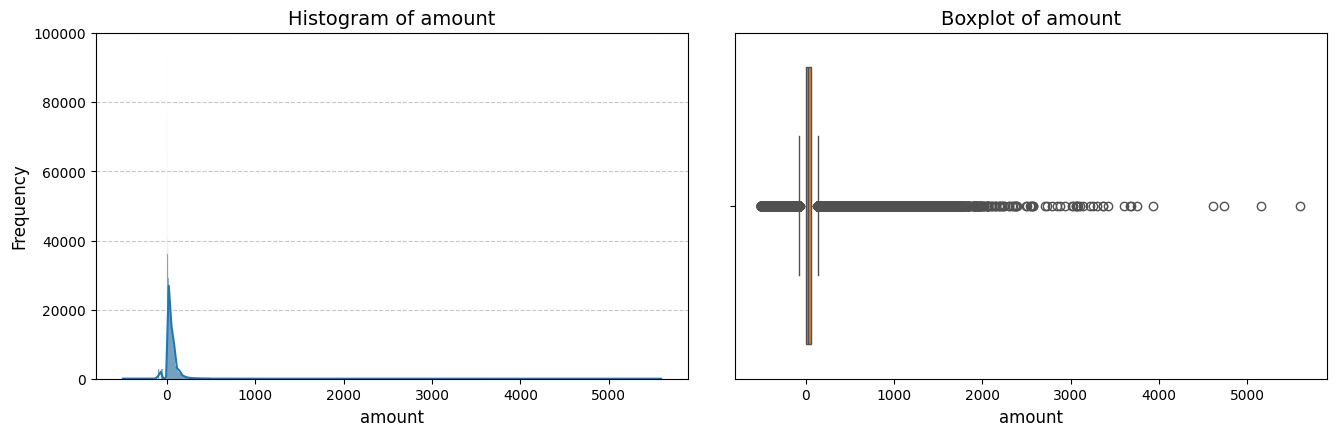

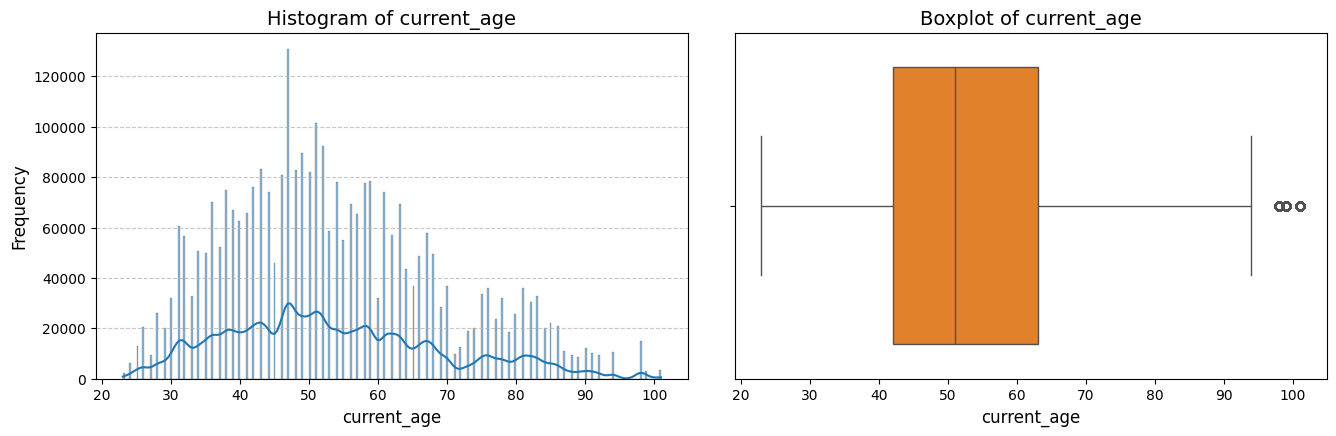

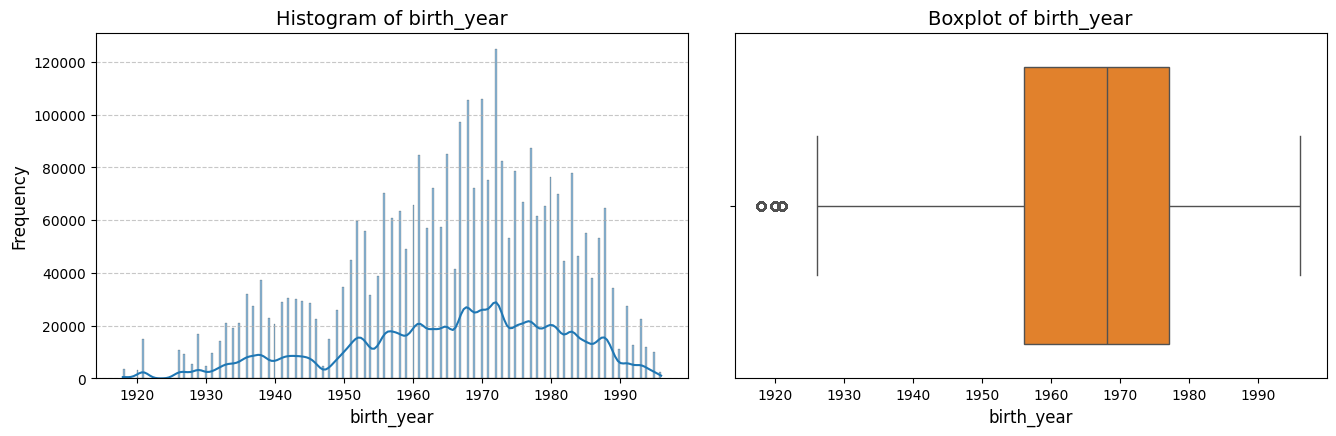

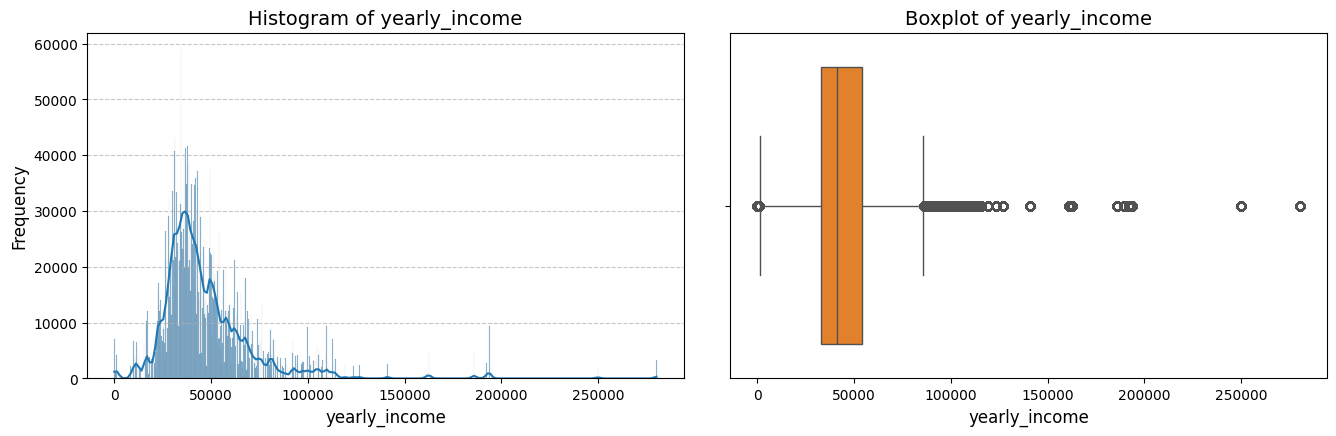

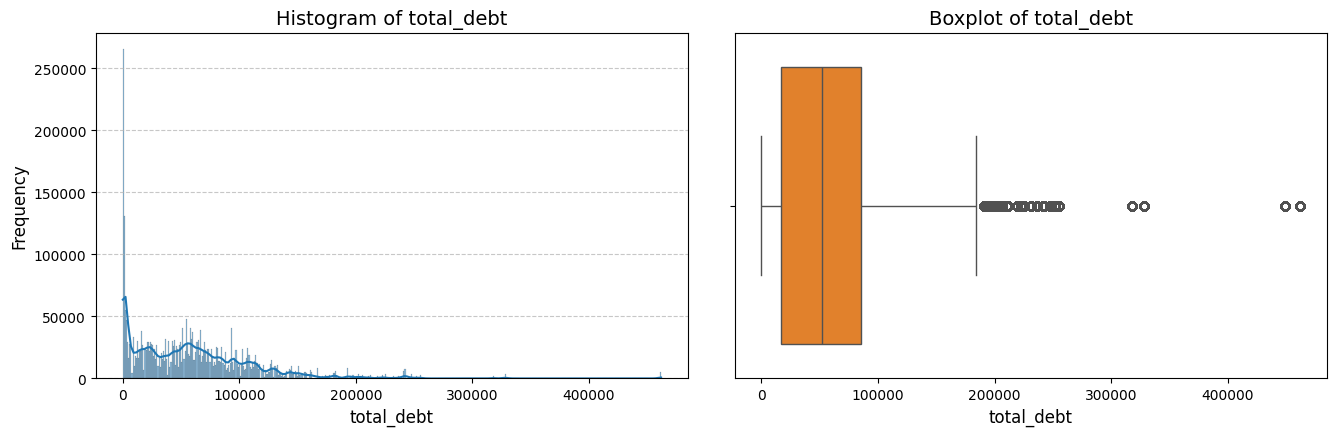

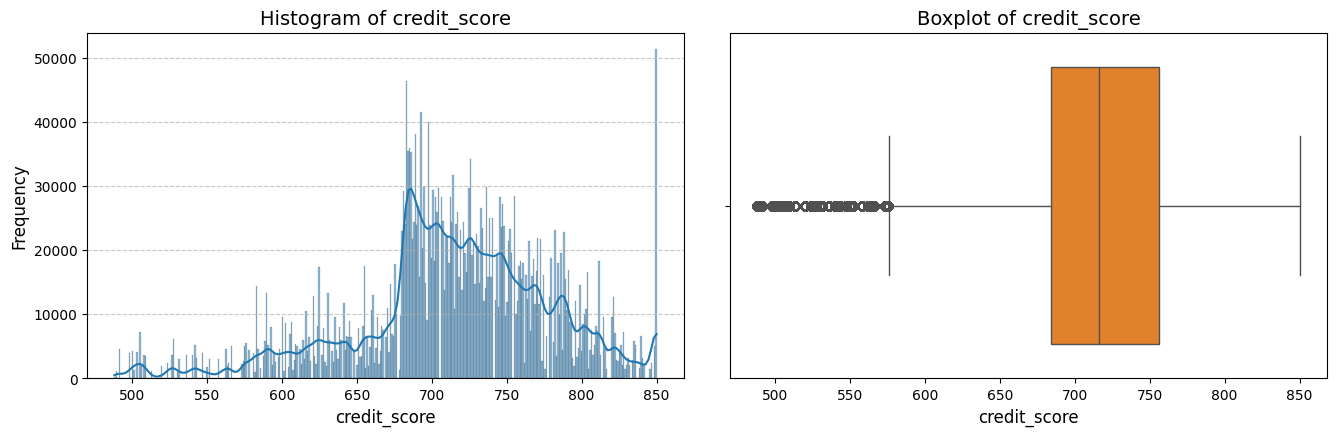

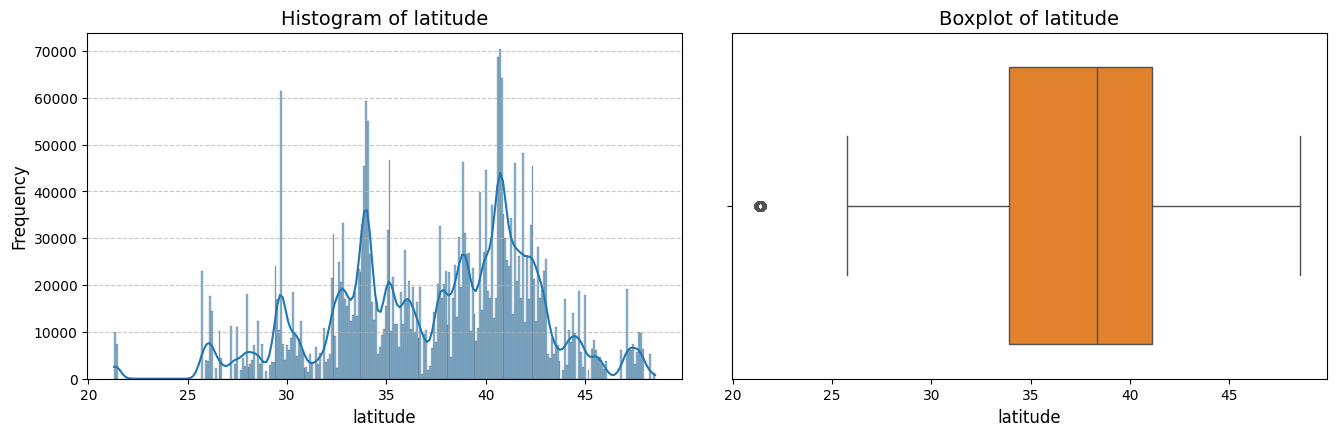

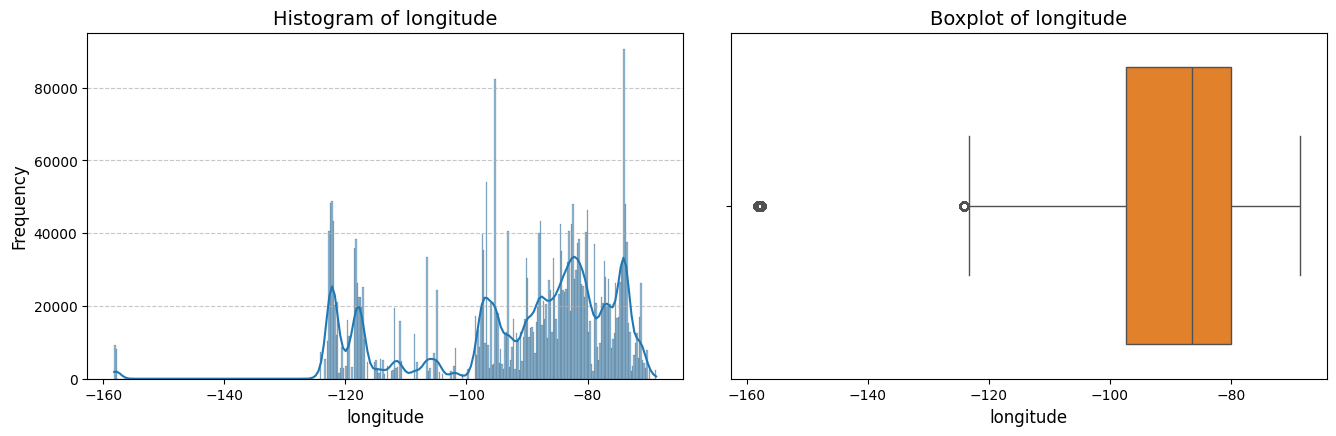

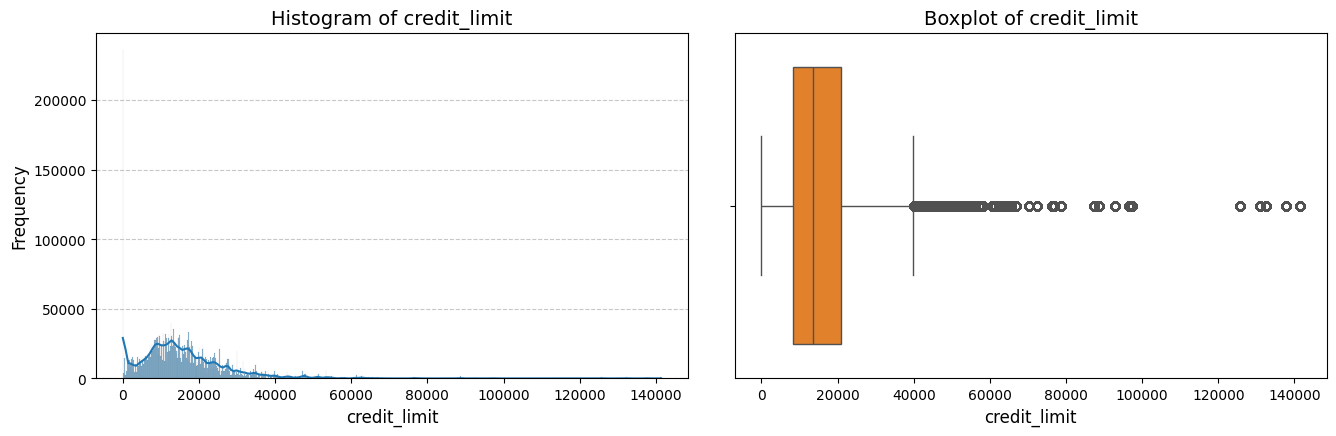

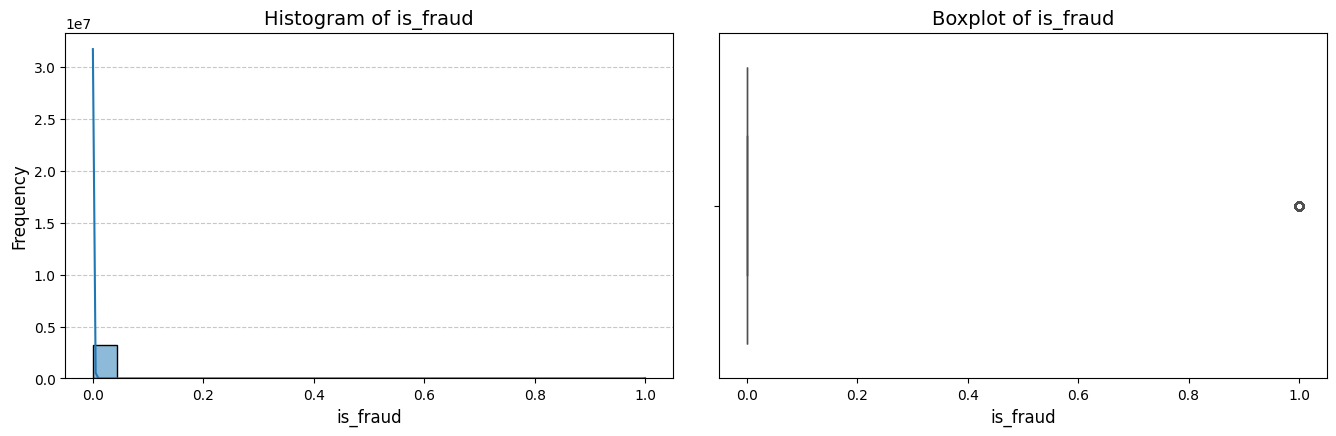

In [ ]:
visualize_num_cols(df, num_cols)

# **clean data**

In [9]:
def handle_missing_values(df: pd.DataFrame, threshold_low=0.05, threshold_high=0.40):
    df = df.copy()
    report_records = []

    for col in df.columns:
        missing_ratio = df[col].isna().mean()

        if missing_ratio == 0:
            report_records.append([col, "No missing values", f"{missing_ratio:.2%}"])
            continue

        if missing_ratio < threshold_low:
            df = df.dropna(subset=[col])
            report_records.append([col, "Dropped rows with missing values", f"{missing_ratio:.2%}"])

        elif threshold_low <= missing_ratio <= threshold_high:
            if pd.api.types.is_numeric_dtype(df[col]):
                df[col] = df[col].fillna(df[col].mean())
                action = "Filled with mean"
            else:
                df[col] = df[col].fillna(df[col].mode()[0])
                action = "Filled with mode"
            report_records.append([col, action, f"{missing_ratio:.2%}"])

        else:
            df = df.drop(columns=[col])
            report_records.append([col, "Dropped column", f"{missing_ratio:.2%}"])

    report_df = pd.DataFrame(report_records, columns=["Column", "Action", "Missing Ratio"])

    return df, report_df

df,report=handle_missing_values(df)
report

,Column,Action,Missing Ratio
0,clean_id,No missing values,0.00%
1,date,No missing values,0.00%
2,amount,No missing values,0.00%
3,merchant_id,No missing values,0.00%
4,merchant_city,No missing values,0.00%
5,merchant_state,Filled with mode,12.24%
6,mcc,No missing values,0.00%
7,client_id,No missing values,0.00%
8,current_age,No missing values,0.00%
9,birth_year,No missing values,0.00%


In [10]:
df['birth_year'] = df['birth_year'].apply(
    lambda x: x if pd.notna(x) and 1900 <= x <= 2024 else np.nan
)

In [13]:
df['current_age'].fillna(df['current_age'].mean(), inplace=True)

In [12]:
cols = ['amount','yearly_income','credit_score','total_debt','credit_limit']

def handle_financial_outliers(df, cols, cap_percentile=0.99):
    for col in cols:
        upper = df[col].quantile(cap_percentile)
        df[col] = np.where(df[col] > upper, upper, df[col])
        df[f'{col}_log'] = np.log1p(df[col])
    return df

df = handle_financial_outliers(df, cols)


In [15]:
df['latitude'] = df['latitude'].apply(lambda x: x if -90 <= x <= 90 else np.nan)
df['longitude'] = df['longitude'].apply(lambda x: x if -180 <= x <= 180 else np.nan)


In [16]:
df.isna().sum().reset_index().rename(columns={'index':'column',0:'missing_values'}).sort_values(by='missing_values',ascending=False)

,column,missing_values
28,amount_log,157736
0,clean_id,0
17,card_brand,0
31,total_debt_log,0
30,credit_score_log,0
29,yearly_income_log,0
27,dayofweek,0
26,day,0
25,month,0
24,year,0


In [17]:
df['amount_log'].fillna(df['amount_log'].median(), inplace=True)


In [ ]:
df.to_csv('cleaned_financial_transactions.csv', index=False)